In [18]:
from graph_tool.all import *

def count_steiner_trees(graph):
    gt_graph = Graph(directed=False)

    # Add vertices
    vertex_map = {}
    for vertex in graph.nodes:
        v = gt_graph.add_vertex()
        vertex_map[vertex] = v

    # Add edges
    for edge in graph.edges:
        v1, v2 = edge
        e = gt_graph.add_edge(vertex_map[v1], vertex_map[v2])

    # Count Steiner trees
    num_steiner_trees = len(list(generation.steiner_trees(gt_graph)))
    print(f"Number of Steiner trees: {num_steiner_trees}")

# Example usage
# Create a graph (replace this with your graph)
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (2, 4), (3, 4)])

# Count the number of Steiner trees using graph-tool
count_steiner_trees(G)


ModuleNotFoundError: No module named 'graph_tool'

In [2]:
import networkx as nx


def is_steiner_tree(graph, source, multicast_receivers, nodes):
    subgraph = graph.subgraph(nodes)
    print(set(nodes))
    return nx.is_tree(subgraph) and set(multicast_receivers).issubset(set(nodes)) 

def dfs_steiner_trees(graph, source, multicast_receivers, current_set, all_steiner_trees):
    if is_steiner_tree(graph, source, multicast_receivers, current_set):
        all_steiner_trees.append(set(current_set))
    
    for neighbor in graph.neighbors(current_set[-1]):
        if neighbor not in current_set:
            dfs_steiner_trees(graph, source, multicast_receivers, current_set + [neighbor], all_steiner_trees)

def find_all_steiner_trees(graph, source, multicast_receivers):
    all_steiner_trees = []
    for neighbor in graph.neighbors(source):
        dfs_steiner_trees(graph, source, multicast_receivers, [source, neighbor], all_steiner_trees)
    
    return all_steiner_trees

# Example usage
G = nx.Graph()
G.add_edges_from([(0,5),(0,3),(3,4),(4,5),(4,6),(5,2),(3,1),(1,6),(6,2)])

source_node = 0
multicast_receivers = {1, 2}

all_steiner_trees = find_all_steiner_trees(G, source_node, multicast_receivers)

print("All Steiner trees:", all_steiner_trees)
print("Total number of Steiner trees:", len(all_steiner_trees))


{0, 5}
{0, 4, 5}
{0, 3, 4, 5}
{0, 1, 3, 4, 5}
{0, 1, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 6}
{0, 4, 5, 6}
{0, 1, 4, 5, 6}
{0, 1, 3, 4, 5, 6}
{0, 2, 4, 5, 6}
{0, 2, 5}
{0, 2, 5, 6}
{0, 2, 4, 5, 6}
{0, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 5, 6}
{0, 1, 2, 3, 5, 6}
{0, 1, 2, 3, 4, 5, 6}
{0, 3}
{0, 3, 4}
{0, 3, 4, 5}
{0, 2, 3, 4, 5}
{0, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 6}
{0, 3, 4, 6}
{0, 1, 3, 4, 6}
{0, 2, 3, 4, 6}
{0, 2, 3, 4, 5, 6}
{0, 1, 3}
{0, 1, 3, 6}
{0, 1, 3, 4, 6}
{0, 1, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 6}
{0, 1, 2, 3, 5, 6}
{0, 1, 2, 3, 4, 5, 6}
All Steiner trees: [{0, 1, 2, 5, 6}, {0, 1, 2, 3, 6}]
Total number of Steiner trees: 2


Number of Spanning Trees :  50


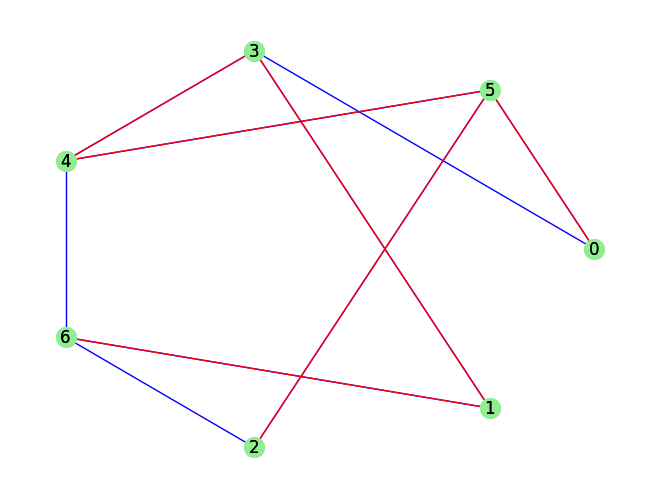

In [38]:




from itertools import product
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt

#Optional: Calculate the total number of spanning trees for a given graph (g) using the Matrix Tree Theorem (Kirchhoff's theorem),
def numSpanTrees(g)-> int:
    if not nx.is_connected(g):
        print("Only for connected graphs")
        return 0
    if nx.is_directed(g): nx.to_undirected(g)
    n = g.number_of_nodes()
    laplacian_matrix = nx.laplacian_matrix(g).toarray() #Calculate the Laplacian matrix
    cofactor_matrix = laplacian_matrix[1:n, 1:n]  # Choose any cofactor by excluding the first row and column
    determinant = np.linalg.det(cofactor_matrix)  #Calculate the determinant of an cofactor of Laplacian matrix
    return int(np.round(abs(determinant)))
#Generate all spanning trees using contraction-deletion algorithm:
def spanTrees(trs, Edg, all_span_trees, k):
    if k == 0:
        all_span_trees.extend(product(*trs))#Expand parallels edges using the Cartesian product
    
    for i in range(k):
        if Edg[k][i] == []: continue
        trs.append(Edg[k][i])
        Edg[i] = [Edg[i][j] + Edg[k][j] for j in range(i)]#Contraction 
        spanTrees(trs, Edg, all_span_trees, k-1)
        trs.pop()
        [Edg[i][j].pop() for j in range(i) for _ in range(len(Edg[k][j]))]#Deletion
#Helper function
def Spanning_Trees_Generator(g, hch = False):
    if not nx.is_connected(g):
        print("Only for connected graphs")
        return 0
    if nx.is_directed(g): nx.to_undirected(g)
    n = g.number_of_nodes()
    edgs = list(g.edges)
    Edg = [[[] for _ in range(n)] for _ in range(n)]
    mx = len(edgs)
    edgNum = dict() #dictionary designed to store labeled edges where the keys are integer labels for the edges, and the values are tuples representing the ordinary edge definitions (in, out)

    for ed in edgs:
        i, j = sorted(ed)
        Edg[j][i] = [mx]
        edgNum[mx] = ed
        mx -= 1
    all_span_trees = []
    spanTrees([], Edg, all_span_trees, n-1)
  
    if hch:  
        return all_span_trees #Generate only the labeled edges (Keys) 
    else:
        return [nx.Graph(edgNum[k] for k in element) for element in all_span_trees] #Generate spanning trees as NetworkX graphics objects

# Example usage
g = nx.Graph()
g.add_edges_from([(0,5),(0,3),(3,4),(4,5),(4,6),(5,2),(3,1),(1,6),(6,2)])
print("Number of Spanning Trees : ", numSpanTrees(g)) #Optional and only for undirected graph
spanTreesGraph = Spanning_Trees_Generator(g)




# Plot the first spanning tree
pos = nx.circular_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, edge_color='b')
nx.draw(spanTreesGraph[3], pos, with_labels=True, node_color='lightgreen', node_size=200, edge_color='r')
plt.show()